In [1]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Legg til src-mappen i sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from data_rens import DataRens
from statistiske_maal import Statistiske_maal
from data_manipulering import DataManipulering

# Temperatur:

* Oppretter et objekt av klassen DataRens og DataManipulering
* Bruker metodene for å opprette en dataframe og manipulere feil i denne

In [2]:
# Oppretter filstien til JSONfil med nedbør
temp_fil = "../data/frost_temp.json"

# Oppretter et nedbørs-objekt i DataRens()
rens_temp = DataRens()
manip_temp = DataManipulering()


# Lager DataFrame av en JSON
df = rens_temp.fra_json_til_dataframe(temp_fil)


### Manipulerer dataen:
df_fjern_verdi = manip_temp.fjern_verdi_for_tilfeldig_aar(df)
df_legg_til_duplikater = manip_temp.legg_til_duplikater_for_tilfeldig_aar(df_fjern_verdi)


#Viser den manipulerte dataframen:
display(df_legg_til_duplikater.head())



Fjern verdi for år 2016 (rad: 36)
Legger til duplikat for år 2015.
Totalt antall rader etter duplisering: 42.


,sourceId,referenceTime,elementId,value,unit,timeOffset,performanceCategory,year
0,SN18700:0,1980-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),5.4,degC,PT0H,C,1980
1,SN18700:0,1981-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),5.2,degC,PT0H,C,1981
2,SN18700:0,1982-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),6.2,degC,PT0H,C,1982
3,SN18700:0,1983-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),7.0,degC,PT0H,C,1983
4,SN18700:0,1984-01-01 00:00:00+00:00,best_estimate_mean(air_temperature P1Y),6.7,degC,PT0H,C,1984


# Datarens av temperatur
- Bruker metode fra DataRens for å rense dataframen

Antall duplikater funnet: 1
Duplikater er fjernet - antall rader:  41
Antall år med manglende verdi: 1
Rader uten verdi:
 year  value unit
 2016    NaN degC
Manglende verdier er erstattet med gjennomsnittet:  6.73


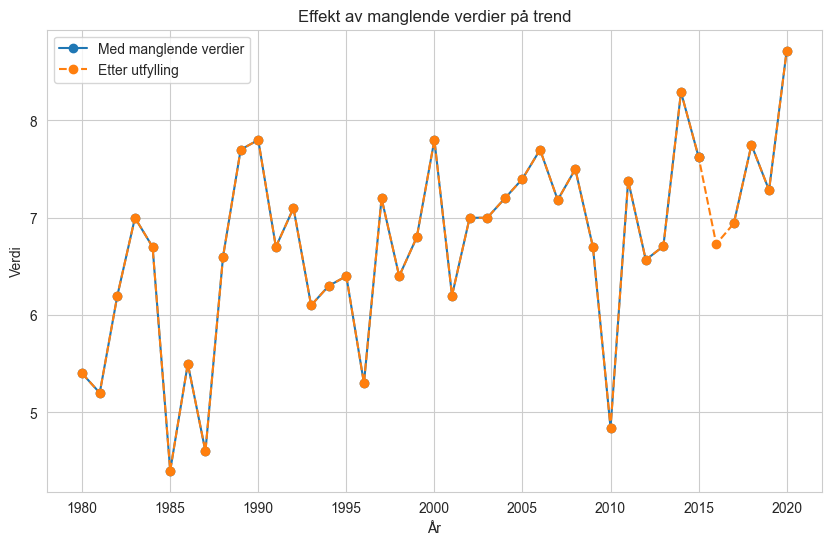

Ferdig renset dataframe (de første fem radene):


,year,value,unit
0,1980,5.4,degC
1,1981,5.2,degC
2,1982,6.2,degC
3,1983,7.0,degC
4,1984,6.7,degC


In [14]:
# Lager en kopi av df - for visualisering 
df_urenset = df_legg_til_duplikater.copy()

# Renser df
df_temp_renset = rens_temp.rens_DataFrame(df_legg_til_duplikater, vis_manglende=False)

# Plotter begge
rens_temp.plot_manglende_data(df_urenset, df_temp_renset)


print('Ferdig renset dataframe (de første fem radene):')
display(df_temp_renset.head())


# Beregning av statistiske mål:
*Beregninger*: <br>
Beregningene gjøres i 4 intervaller: <br>
1980-1989 <br>
1990-1999 <br>
2000-2009 <br>
2010-2020 <br>

Samt en beregning for hele intervallet i sin helhet (1980-2020)

**Beregning av gjennomsnitt**


In [4]:
temp_mål = Statistiske_maal()

gjennomsnitt_temp = temp_mål.gjennomsnitt(df_temp_renset)

print("Gjennomsnitt i 4 intervaller + totalt: ")
for key, value in gjennomsnitt_temp.items():
    print(f"{key}: {value} °C")


Gjennomsnitt i 4 intervaller + totalt: 
1980-1989: 5.93 °C
1990-1999: 6.61 °C
2000-2009: 7.17 °C
2010-2020: 7.17 °C
Totalt: 6.73 °C


**Beregning av median**

In [5]:
median_temp = temp_mål.median(df_temp_renset)

print("Median i 4 intervaller + totalt: ")
for key, value in median_temp.items():
    print(f"{key}: {value} °C")

Median i 4 intervaller + totalt: 
1980-1989: 5.85 °C
1990-1999: 6.55 °C
2000-2009: 7.19 °C
2010-2020: 7.28 °C
Totalt: 6.8 °C


**Beregning av standardavvik**

In [6]:
standardavvik_temp = temp_mål.standardavvik(df_temp_renset)

print("Standardavvik i 4 intervaller + totalt: ")
for key, value in standardavvik_temp.items():
    print(f"{key}: {value} °C")

Standardavvik i 4 intervaller + totalt: 
1980-1989: 1.08 °C
1990-1999: 0.68 °C
2000-2009: 0.48 °C
2010-2020: 1.02 °C
Totalt: 0.97 °C


# Visualisering

In [7]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from visualisering import vis_statistikk
from visualisering import visualiser_statistikk_per_tiår


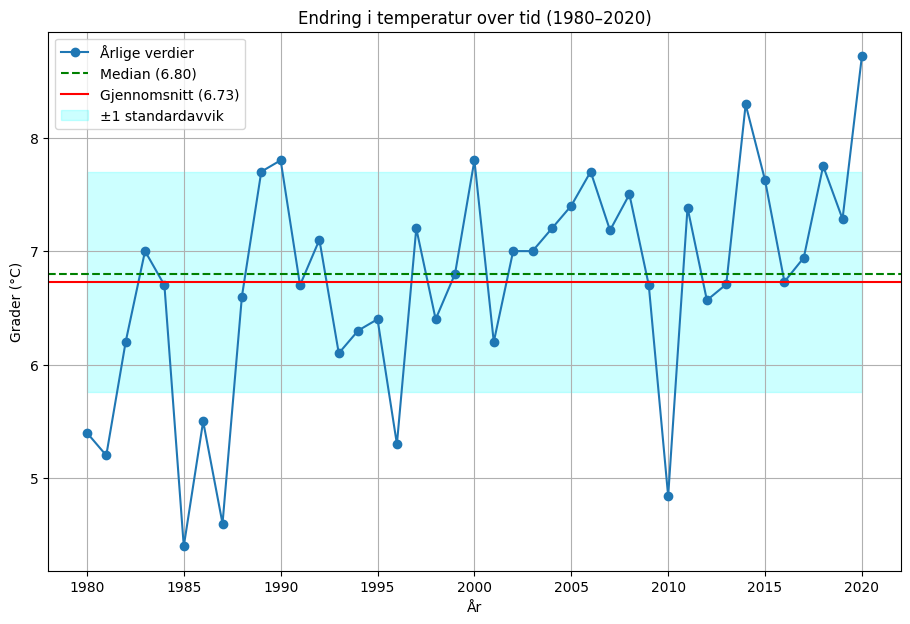

In [8]:
vis_statistikk(
    df_temp_renset["year"],
    df_temp_renset["value"],
    median=median_temp["Totalt"],
    gjennomsnitt=gjennomsnitt_temp["Totalt"],
    std=standardavvik_temp["Totalt"],
    tittel="Endring i temperatur over tid (1980–2020)",
    y_label="Grader (°C)"
)


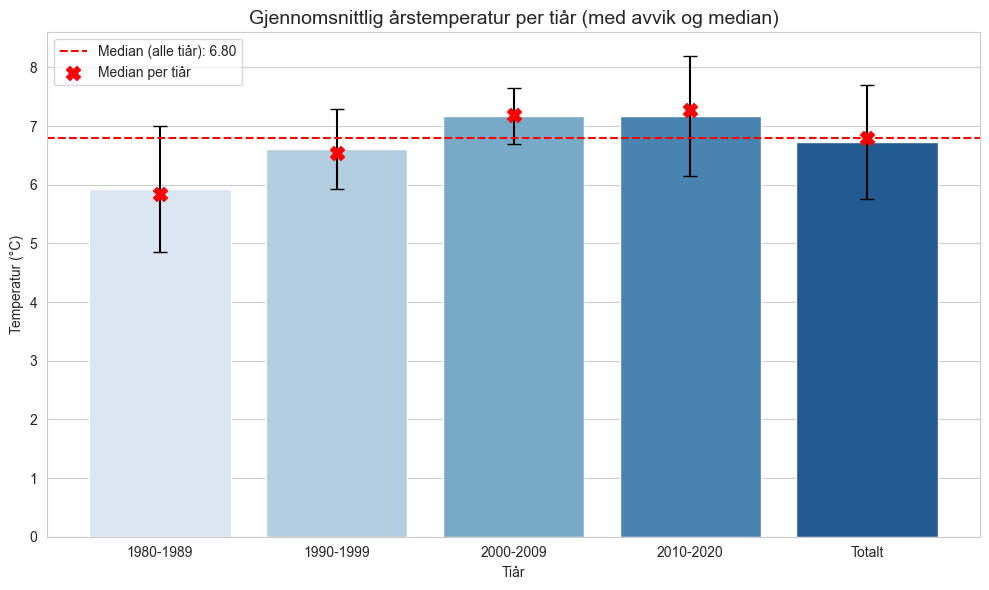

In [9]:
visualiser_statistikk_per_tiår(
    gjennomsnitt=gjennomsnitt_temp,
    median=median_temp,
    standardavvik=standardavvik_temp,
    tittel="Gjennomsnittlig årstemperatur per tiår (med avvik og median)",
    ylabel="Temperatur (°C)"
)


# Lagrer viktige variabler i med %store for å bruke videre

In [10]:
# lager variablene for en samlet visualisering

%store df_temp_renset
%store gjennomsnitt_temp
%store standardavvik_temp
%store median_temp

Stored 'df_temp_renset' (DataFrame)
Stored 'gjennomsnitt_temp' (dict)
Stored 'standardavvik_temp' (dict)
Stored 'median_temp' (dict)


# Prediktiv analyse

In [11]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from prediktiv_analyse import TrendModel

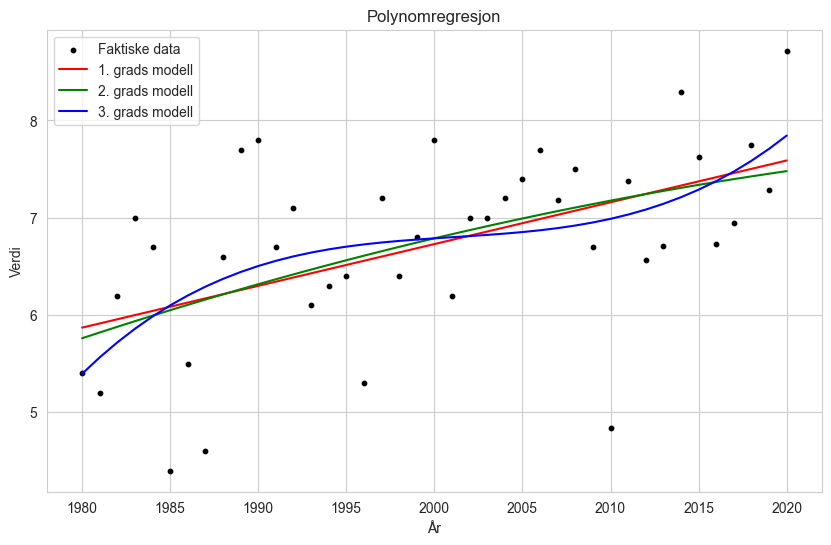

R²-scorer for modellene:
  1. grads modell: 0.2798
  2. grads modell: 0.2828
  3. grads modell: 0.3104


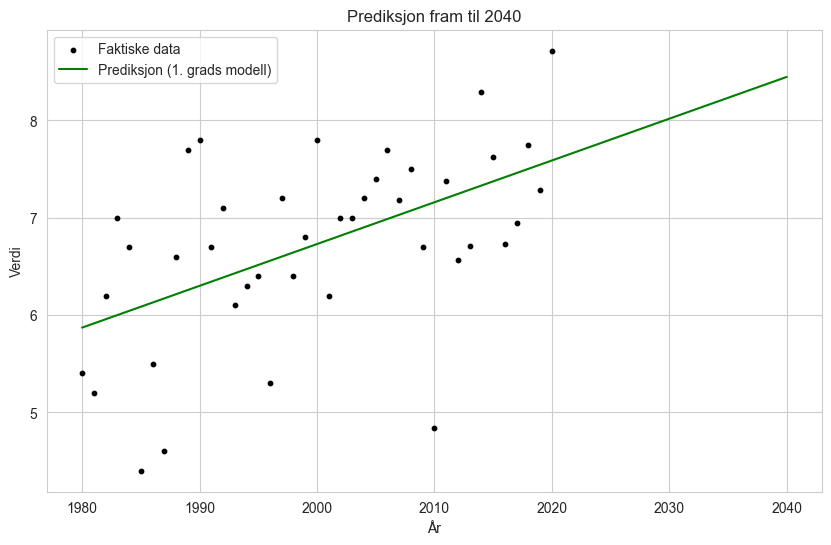

In [12]:
temp_model = TrendModel(df_temp_renset)
temp_model.fit_models()
temp_model.plot_models()
temp_model.print_r2_scores()
temp_model.plot_prediction(2040, deg=1)
